In [1]:
import numpy as np
import os
from data_func.iostream import load_mahalanobis_distance_data,load_BLISCO_data
from data_func.utils import Get_typeName
from itertools import product




In [2]:
def Get_Annual_Mahalanobis_Distances(
    buffer_radius_list, startyear, endyear,
    BLISCO_obs_data_recording, BLISCO_final_data_recording,
    EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
    EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
    AllMonth_AllYear_Martix_Mahalanobis_distance_recording
):
    MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    years = [str(y) for y in range(startyear, endyear + 1)]

    # ---- 1) BLISCO obs/final ----
    obs_parts = []
    final_parts = []
    count = 0

    for iradius in buffer_radius_list:
        for y in years:
            temp_obs = []
            temp_final = []
            for m in MONTHS:
                temp_obs.append(BLISCO_obs_data_recording[iradius][y][m])
                temp_final.append(BLISCO_final_data_recording[iradius][y][m])

            # shape: (n_site, 12)
            temp_obs_array = np.stack(temp_obs, axis=1)
            temp_final_array = np.stack(temp_final, axis=1)

            # average over months -> (n_site,)
            temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
            temp_final_mean = np.nanmean(temp_final_array, axis=1)

            count += 1
            # 关键：这里直接 append 1D array，不要再套一层 []
            obs_parts.append(temp_obs_mean)
            final_parts.append(temp_final_mean)

    print('total number of parts:', count)

    # 1D 拼接：shape -> (480 * n_site_per_part,)
    All_BLISCO_obs_data   = np.concatenate(obs_parts, axis=0)
    All_BLISCO_final_data = np.concatenate(final_parts, axis=0)

    # ---- 2) Mahalanobis distances ----
    eme_parts = []   # EachMonth_EachYear
    emay_parts = []  # EachMonth_AllYear
    aamay_parts = [] # AllMonth_AllYear

    for iradius in buffer_radius_list:
        for y in years:
            temp_eme = []
            temp_emay = []
            temp_aamay = []
            for m in MONTHS:
                temp_eme.append(
                    EachMonth_EachYear_Martix_Mahalanobis_distance_recording[iradius][y][m]
                )
                temp_emay.append(
                    EachMonth_AllYear_Martix_Mahalanobis_distance_recording[iradius][y][m]
                )
                temp_aamay.append(
                    AllMonth_AllYear_Martix_Mahalanobis_distance_recording[iradius][y][m]
                )

            temp_eme_array = np.stack(temp_eme, axis=1)
            temp_emay_array = np.stack(temp_emay, axis=1)
            temp_aamay_array = np.stack(temp_aamay, axis=1)

            temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
            temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
            temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)

            # 同样这里也不要加 []
            eme_parts.append(temp_eme_mean)
            emay_parts.append(temp_emay_mean)
            aamay_parts.append(temp_aamay_mean)

    All_EachMonth_EachYear_Martix_Mahalanobis_distance = np.concatenate(eme_parts, axis=0)
    All_EachMonth_AllYear_Martix_Mahalanobis_distance  = np.concatenate(emay_parts, axis=0)
    All_AllMonth_AllYear_Martix_Mahalanobis_distance   = np.concatenate(aamay_parts, axis=0)

    # ---- 去 NaN（每个都是 1D）----
    All_BLISCO_obs_data = All_BLISCO_obs_data[~np.isnan(All_BLISCO_obs_data)]
    All_BLISCO_final_data = All_BLISCO_final_data[~np.isnan(All_BLISCO_final_data)]
    All_EachMonth_EachYear_Martix_Mahalanobis_distance = \
        All_EachMonth_EachYear_Martix_Mahalanobis_distance[~np.isnan(
            All_EachMonth_EachYear_Martix_Mahalanobis_distance)]
    All_EachMonth_AllYear_Martix_Mahalanobis_distance = \
        All_EachMonth_AllYear_Martix_Mahalanobis_distance[~np.isnan(
            All_EachMonth_AllYear_Martix_Mahalanobis_distance)]
    All_AllMonth_AllYear_Martix_Mahalanobis_distance = \
        All_AllMonth_AllYear_Martix_Mahalanobis_distance[~np.isnan(
            All_AllMonth_AllYear_Martix_Mahalanobis_distance)]

    print('shape of All_BLISCO_obs_data:', All_BLISCO_obs_data.shape)
    print('shape of All_BLISCO_final_data:', All_BLISCO_final_data.shape)
    print('shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance:',
          All_EachMonth_EachYear_Martix_Mahalanobis_distance.shape)
    print('shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance:',
          All_EachMonth_AllYear_Martix_Mahalanobis_distance.shape)
    print('shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance:',
          All_AllMonth_AllYear_Martix_Mahalanobis_distance.shape)

    return (All_BLISCO_obs_data,
            All_BLISCO_final_data,
            All_EachMonth_EachYear_Martix_Mahalanobis_distance,
            All_EachMonth_AllYear_Martix_Mahalanobis_distance,
            All_AllMonth_AllYear_Martix_Mahalanobis_distance)


In [3]:
def Get_Mahalanobis_Distances(MONTHS_list, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording):

    years = [str(y) for y in range(startyear, endyear+1)]
    # ---- 1) BLISCO obs/final ----
    obs_parts = []
    final_parts = []
    count = 0
    
    for iradius in buffer_radius_list:
        for y in years:
            temp_obs = []
            temp_final = []
            for m in MONTHS_list:
                temp_obs.append(BLISCO_obs_data_recording[iradius][y][m])
                temp_final.append(BLISCO_final_data_recording[iradius][y][m])
            # average over months -> (n_site,)            
            count +=1
            # 关键：这里直接 append 1D array，不要再套一层 []
            obs_parts.append( temp_obs )
            final_parts.append( temp_final )
    
    All_BLISCO_obs_data   = np.concatenate( [np.concatenate(part,axis=0) for part in obs_parts], axis=0 )
    All_BLISCO_final_data = np.concatenate( [np.concatenate(part,axis=0) for part in final_parts], axis=0 )
    # ---- 2) Mahalanobis distances ----
    eme_parts = []   # EachMonth_EachYear
    emay_parts = []  # EachMonth_AllYear
    aamay_parts = [] # AllMonth_AllYear

    for iradius in buffer_radius_list:
        for y in years:
            temp_eme = []
            temp_emay = []
            temp_aamay = []
            for m in MONTHS_list:
                temp_eme.append( EachMonth_EachYear_Martix_Mahalanobis_distance_recording[iradius][y][m] )
                temp_emay.append( EachMonth_AllYear_Martix_Mahalanobis_distance_recording[iradius][y][m] )
                temp_aamay.append( AllMonth_AllYear_Martix_Mahalanobis_distance_recording[iradius][y][m] )
            # 同样这里也不要加 []
            eme_parts.append( np.concatenate( temp_eme, axis=0 ) )
            emay_parts.append( np.concatenate( temp_emay, axis=0 ) )
            aamay_parts.append( np.concatenate( temp_aamay, axis=0 ) )
    All_EachMonth_EachYear_Martix_Mahalanobis_distance = np.concatenate( eme_parts, axis=0 )
    All_EachMonth_AllYear_Martix_Mahalanobis_distance  = np.concatenate( emay_parts, axis=0 )
    All_AllMonth_AllYear_Martix_Mahalanobis_distance   = np.concatenate( aamay_parts, axis=0 )
    # ---- 去 NaN（每个都是 1D）----
    All_BLISCO_obs_data = All_BLISCO_obs_data[ ~np.isnan( All_BLISCO_obs_data ) ]
    All_BLISCO_final_data = All_BLISCO_final_data[ ~np.isnan( All_BLISCO_final_data ) ]
    All_EachMonth_EachYear_Martix_Mahalanobis_distance = \
        All_EachMonth_EachYear_Martix_Mahalanobis_distance[ ~np.isnan( All_EachMonth_EachYear_Martix_Mahalanobis_distance ) ]
    All_EachMonth_AllYear_Martix_Mahalanobis_distance = \
        All_EachMonth_AllYear_Martix_Mahalanobis_distance[ ~np.isnan( All_EachMonth_AllYear_Martix_Mahalanobis_distance ) ]
    All_AllMonth_AllYear_Martix_Mahalanobis_distance = \
        All_AllMonth_AllYear_Martix_Mahalanobis_distance[ ~np.isnan( All_AllMonth_AllYear_Martix_Mahalanobis_distance ) ]
    print('shape of All_BLISCO_obs_data:', All_BLISCO_obs_data.shape)
    print('shape of All_BLISCO_final_data:', All_BLISCO_final_data.shape)
    print('shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance:', All_EachMonth_EachYear_Martix_Mahalanobis_distance.shape)
    print('shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance:', All_EachMonth_AllYear_Martix_Mahalanobis_distance.shape)
    print('shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance:', All_AllMonth_AllYear_Martix_Mahalanobis_distance.shape)     
    return (All_BLISCO_obs_data,
            All_BLISCO_final_data,
            All_EachMonth_EachYear_Martix_Mahalanobis_distance,
            All_EachMonth_AllYear_Martix_Mahalanobis_distance,
            All_AllMonth_AllYear_Martix_Mahalanobis_distance)

In [4]:
def save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                            species,special_name, version,nearby_sites_number):
    outdir = '/Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/'
    outdir = outdir + f'{species}/{version}/Mahalanobis_distance_LOWESS_values/'
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    df = {
        'Mahalanobis_distance_bin_centers': bin_centers,
        'WINTER_LOWESS_values': WINTER_LOWESS_values,
        'SPRING_LOWESS_values': SPRING_LOWESS_values,
        'SUMMER_LOWESS_values': SUMMER_LOWESS_values,
        'AUTUMN_LOWESS_values': AUTUMN_LOWESS_values,
        'ALL_LOWESS_values': ALL_LOWESS_values
    }
    output_path = os.path.join(outdir, f'{species}_nearby_sites-{nearby_sites_number}{special_name}_Mahalanobis_distance_LOWESS_values.npy')
    np.save(output_path, df)
    print(f'Saved LOWESS values to {output_path}')

In [5]:
# Bin the obs and final data based on Mahalanobis distances distributions
# Calculate the rRMSE in each bin to see distribution

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
## More bins for smaller Mahalanobis distances and fewer bins for larger Mahalanobis distances
## 25 bins for 0-25 percentile, 12 bins for 25-50 percentile, 6 bins for 50-75 percentile, 3 bins for 75-90 percentile, 1 bin for 90-100 percentile
def plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                       Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                       Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                       Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                       
                                       All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                       low_percentile, high_percentile, species, start_bin,end_bin,number_bins, LOWESS_frac=0.5,
                                       y_min=0.2, y_max=0.5,
                                       rRMSE:bool=True,abs_bias:bool=False):
    title_name = {
        'PM25' : r'PM$_{2.5}$',
        'NO3' : r'NO$_{3}^{-}$',
        'SO4' : r'SO$_{4}^{2-}$',
        'NH4' : r'NH$_{4}^{+}$',
        'BC' : r'BC',
        'OM' : r'OM',
        'DUST' : r'DUST',
        'SS' : r'SS'
    }
    mahalanobis_distance_bins = np.linspace(0, 1, number_bins + 1)
    mahalanobis_distance_bins = start_bin + (end_bin - start_bin) * mahalanobis_distance_bins
    print(mahalanobis_distance_bins)
    WINTER_rRMSE_list = []
    SPRING_rRMSE_list = []
    SUMMER_rRMSE_list = []
    AUTUMN_rRMSE_list = []
    ALL_rRMSE_list = []
    bin_centers = []
    Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = np.log(Winter_AllMonth_AllYear_Martix_Mahalanobis_distance + 1)
    Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = np.log(Summer_AllMonth_AllYear_Martix_Mahalanobis_distance + 1)
    Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = np.log(Spring_AllMonth_AllYear_Martix_Mahalanobis_distance + 1)
    Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = np.log(Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance + 1)
    All_AllMonth_AllYear = np.log(All_AllMonth_AllYear + 1)
    
    for i in range(len(mahalanobis_distance_bins)-1):
        bin_lower = mahalanobis_distance_bins[i]
        bin_upper = mahalanobis_distance_bins[i+1]
        bin_center = (bin_lower + bin_upper) / 2
        bin_centers.append(bin_center)
        # Get indices of data points within the current Mahalanobis distance bin
        winter_indices_in_bin = np.where((Winter_AllMonth_AllYear_Martix_Mahalanobis_distance >= bin_lower) & 
                              (Winter_AllMonth_AllYear_Martix_Mahalanobis_distance < bin_upper))[0]
        summer_indices_in_bin = np.where((Summer_AllMonth_AllYear_Martix_Mahalanobis_distance >= bin_lower) & 
                              (Summer_AllMonth_AllYear_Martix_Mahalanobis_distance < bin_upper))[0]
        spring_indices_in_bin = np.where((Spring_AllMonth_AllYear_Martix_Mahalanobis_distance >= bin_lower) & 
                              (Spring_AllMonth_AllYear_Martix_Mahalanobis_distance < bin_upper))[0]
        autumn_indices_in_bin = np.where((Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance >= bin_lower) & 
                              (Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance < bin_upper))[0]
        all_indices_in_bin = np.where((All_AllMonth_AllYear >= bin_lower) & 
                              (All_AllMonth_AllYear < bin_upper))[0]


        if len(winter_indices_in_bin) > 0:
            winter_obs_in_bin = Winter_BLISCO_obs_data[winter_indices_in_bin]
            winter_final_in_bin = Winter_BLISCO_final_data[winter_indices_in_bin]
            residual_in_bin = (winter_final_in_bin - winter_obs_in_bin)/ (winter_obs_in_bin + 0.0001)
            # Remove NaN values and remove the 5th and 95th percentiles to avoid outliers
            valid_indices = ~np.isnan(winter_obs_in_bin) & ~np.isnan(winter_final_in_bin)
            p5 = np.percentile(residual_in_bin[valid_indices], low_percentile)
            p95 = np.percentile(residual_in_bin[valid_indices], high_percentile)
            valid_indices &= (residual_in_bin >= p5) & (residual_in_bin <= p95)
            winter_obs_in_bin = winter_obs_in_bin[valid_indices]
            winter_final_in_bin = winter_final_in_bin[valid_indices]

            if len(winter_final_in_bin) > 0:
                if rRMSE:
                    rmse = np.sqrt(np.mean((winter_final_in_bin - winter_obs_in_bin) ** 2))
                    mean_obs = np.mean(winter_final_in_bin)
                    rRMSE = rmse / mean_obs if mean_obs != 0 else np.nan
                    WINTER_rRMSE_list.append(rRMSE)
                elif abs_bias:
                    abs_bias = np.mean(np.abs(winter_final_in_bin - winter_obs_in_bin)/ winter_final_in_bin)
                    WINTER_rRMSE_list.append(abs_bias)
            else:
                WINTER_rRMSE_list.append(np.nan)
        else:
            WINTER_rRMSE_list.append(np.nan)
    

        if len(spring_indices_in_bin) > 0:
            spring_obs_in_bin = Spring_BLISCO_obs_data[spring_indices_in_bin]
            spring_final_in_bin = Spring_BLISCO_final_data[spring_indices_in_bin]
            residual_in_bin = (spring_final_in_bin - spring_obs_in_bin) / (spring_obs_in_bin + 0.0001)
            # Remove NaN values and remove the 5th and 95th percentiles to avoid outliers
            valid_indices = ~np.isnan(spring_obs_in_bin) & ~np.isnan(spring_final_in_bin)
            p5 = np.percentile(residual_in_bin[valid_indices], low_percentile)
            p95 = np.percentile(residual_in_bin[valid_indices], high_percentile)
            valid_indices &= (residual_in_bin >= p5) & (residual_in_bin <= p95)
            spring_obs_in_bin = spring_obs_in_bin[valid_indices]
            spring_final_in_bin = spring_final_in_bin[valid_indices]

            if len(spring_final_in_bin) > 0:
                if rRMSE:
                    rmse = np.sqrt(np.mean((spring_final_in_bin - spring_obs_in_bin) ** 2))
                    mean_obs = np.mean(spring_final_in_bin)
                    rRMSE = rmse / mean_obs if mean_obs != 0 else np.nan
                    SPRING_rRMSE_list.append(rRMSE)
                elif abs_bias:
                    abs_bias = np.mean(np.abs(spring_final_in_bin - spring_obs_in_bin)/ spring_final_in_bin)
                    SPRING_rRMSE_list.append(abs_bias)
            else:
                SPRING_rRMSE_list.append(np.nan)
        else:
            SPRING_rRMSE_list.append(np.nan)
        
        if len(summer_indices_in_bin) > 0:
            summer_obs_in_bin = Summer_BLISCO_obs_data[summer_indices_in_bin]
            summer_final_in_bin = Summer_BLISCO_final_data[summer_indices_in_bin]
            residual_in_bin = (summer_final_in_bin - summer_obs_in_bin) / (summer_obs_in_bin + 0.0001)
            # Remove NaN values and remove the 5th and 95th percentiles to avoid outliers
            valid_indices = ~np.isnan(summer_obs_in_bin) & ~np.isnan(summer_final_in_bin)
            p5 = np.percentile(residual_in_bin[valid_indices], low_percentile)
            p95 = np.percentile(residual_in_bin[valid_indices], high_percentile)
            valid_indices &= (residual_in_bin >= p5) & (residual_in_bin <= p95)
            summer_obs_in_bin = summer_obs_in_bin[valid_indices]
            summer_final_in_bin = summer_final_in_bin[valid_indices]

            if len(summer_final_in_bin) > 0:
                if rRMSE:
                    rmse = np.sqrt(np.mean((summer_final_in_bin - summer_obs_in_bin) ** 2))
                    mean_obs = np.mean(summer_final_in_bin)
                    rRMSE = rmse / mean_obs if mean_obs != 0 else np.nan
                    SUMMER_rRMSE_list.append(rRMSE)
                elif abs_bias:
                    abs_bias = np.mean(np.abs(summer_final_in_bin - summer_obs_in_bin)/ summer_final_in_bin)
                    SUMMER_rRMSE_list.append(abs_bias)
            else:
                SUMMER_rRMSE_list.append(np.nan)
        else:
            SUMMER_rRMSE_list.append(np.nan)
        
        if len(autumn_indices_in_bin) > 0:
            autumn_obs_in_bin = Autumn_BLISCO_obs_data[autumn_indices_in_bin]
            autumn_final_in_bin = Autumn_BLISCO_final_data[autumn_indices_in_bin]
            residual_in_bin = (autumn_final_in_bin - autumn_obs_in_bin) / (autumn_obs_in_bin + 0.0001)
            # Remove NaN values and remove the 5th and 95th percentiles to avoid outliers
            valid_indices = ~np.isnan(autumn_obs_in_bin) & ~np.isnan(autumn_final_in_bin)
            p5 = np.percentile(residual_in_bin[valid_indices], low_percentile)
            p95 = np.percentile(residual_in_bin[valid_indices], high_percentile)
            valid_indices &= (residual_in_bin >= p5) & (residual_in_bin <= p95)
            autumn_obs_in_bin = autumn_obs_in_bin[valid_indices]
            autumn_final_in_bin = autumn_final_in_bin[valid_indices]

            if len(autumn_final_in_bin) > 0:
                if rRMSE:
                    rmse = np.sqrt(np.mean((autumn_final_in_bin - autumn_obs_in_bin) ** 2))
                    mean_obs = np.mean(autumn_final_in_bin)
                    rRMSE = rmse / mean_obs if mean_obs != 0 else np.nan
                    AUTUMN_rRMSE_list.append(rRMSE)
                elif abs_bias:
                    abs_bias = np.mean(np.abs(autumn_final_in_bin - autumn_obs_in_bin)/ autumn_final_in_bin)
                    AUTUMN_rRMSE_list.append(abs_bias)
            else:
                AUTUMN_rRMSE_list.append(np.nan)
        else:
            AUTUMN_rRMSE_list.append(np.nan)   
         
        if len(all_indices_in_bin) > 0:
            all_obs_in_bin = All_BLISCO_obs_data[all_indices_in_bin]
            all_final_in_bin = All_BLISCO_final_data[all_indices_in_bin]
            residual_in_bin = (all_final_in_bin - all_obs_in_bin) / (all_obs_in_bin + 0.0001)
            # Remove NaN values and remove the 5th and 95th percentiles to avoid outliers
            valid_indices = ~np.isnan(all_obs_in_bin) & ~np.isnan(all_final_in_bin)
            p5 = np.percentile(residual_in_bin[valid_indices], low_percentile)
            p95 = np.percentile(residual_in_bin[valid_indices], high_percentile)
            valid_indices &= (residual_in_bin >= p5) & (residual_in_bin <= p95)
            all_obs_in_bin = all_obs_in_bin[valid_indices]
            all_final_in_bin = all_final_in_bin[valid_indices]

            if len(all_final_in_bin) > 0:
                if rRMSE:
                    rmse = np.sqrt(np.mean((all_final_in_bin - all_obs_in_bin) ** 2))
                    mean_obs = np.mean(all_final_in_bin)
                    rRMSE = rmse / mean_obs if mean_obs != 0 else np.nan
                    ALL_rRMSE_list.append(rRMSE)
                elif abs_bias:
                    abs_bias = np.mean(np.abs(all_final_in_bin - all_obs_in_bin)/ all_final_in_bin)
                    ALL_rRMSE_list.append(abs_bias)
            else:
                ALL_rRMSE_list.append(np.nan)
        else:
            ALL_rRMSE_list.append(np.nan)
    temp_lowess_result = lowess(WINTER_rRMSE_list, bin_centers, frac=LOWESS_frac, return_sorted=False)
    print(temp_lowess_result.shape)
    WINTER_LOWESS_values = temp_lowess_result
    temp_lowess_result = lowess(SUMMER_rRMSE_list, bin_centers, frac=LOWESS_frac, return_sorted=False)
    SUMMER_LOWESS_values = temp_lowess_result
    temp_lowess_result = lowess(SPRING_rRMSE_list, bin_centers, frac=LOWESS_frac, return_sorted=False)
    SPRING_LOWESS_values = temp_lowess_result
    temp_lowess_result = lowess(AUTUMN_rRMSE_list, bin_centers, frac=LOWESS_frac, return_sorted=False)
    AUTUMN_LOWESS_values = temp_lowess_result
    temp_lowess_result = lowess(ALL_rRMSE_list, bin_centers, frac=LOWESS_frac, return_sorted=False)
    ALL_LOWESS_values = temp_lowess_result
    # Plot rRMSE vs. Mahalanobis distance bins
    plt.figure(figsize=(10, 6))
    plt.scatter(bin_centers, SUMMER_rRMSE_list, marker='o', label='Summer',c='orange')
    plt.scatter(bin_centers, WINTER_rRMSE_list, marker='o', label='Winter',c='blue')
    plt.scatter(bin_centers, SPRING_rRMSE_list, marker='o', label='Spring',c='green')
    plt.scatter(bin_centers, AUTUMN_rRMSE_list, marker='o', label='Autumn',c='red')
    plt.scatter(bin_centers, ALL_rRMSE_list, marker='o', label='Annual',c='purple')
    plt.plot(bin_centers, SUMMER_LOWESS_values, color='orange', linestyle='--', linewidth=2)
    plt.plot(bin_centers, WINTER_LOWESS_values, color='blue', linestyle='--', linewidth=2)
    plt.plot(bin_centers, SPRING_LOWESS_values, color='green', linestyle='--', linewidth=2)
    plt.plot(bin_centers, AUTUMN_LOWESS_values, color='red', linestyle='--', linewidth=2)
    plt.plot(bin_centers, ALL_LOWESS_values, color='purple', linestyle='--', linewidth=2)
    if species == 'PM25':
        plt.legend()
    plt.ylim(y_min, y_max)
    plt.xlabel('Mahalanobis Distance (unitless)',fontdict={'size':14})
    plt.ylabel('rRMSE',fontdict={'size':14})
    plt.title('{} rRMSE vs. Mahalanobis Distance Bins'.format(title_name[species]),fontdict={'size':16})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.show()
    return bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values


In [6]:
species = 'PM25'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 34
special_name = '_BenchMark'
width = 11
height = 11
nearby_sites_number = 30
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10

mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height, nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [7]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
#del BLISCO_data_dic
#gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [8]:

## Get Four Seasons and All data, and plot five lines in one figure
WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances( buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (2009440,)
shape of All_BLISCO_final_data: (2009440,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (2009440,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (2009440,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (2009440,)
shape of All_BLISCO_obs_data: (2024360,)
shape of All_BLISCO_final_data: (2024360,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (2024360,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (2024360,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (2024360,)
shape of All_BLISCO_obs_data: (2032880,)
shape of All_BLISCO_final_data: (2032880,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (2032880,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (2032880,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (2032880,)
shape of All_BLISCO_obs_data: (2034740,)
shape of All_BLISCO_final_data: (2034740,)
shape of All_EachMonth_Ea

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)


total number of parts: 480


/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


shape of All_BLISCO_obs_data: (722000,)
shape of All_BLISCO_final_data: (722000,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (722000,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (722000,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (722000,)


valid_final size: 722000
valid_obs size: 722000
valid_x size: 722000


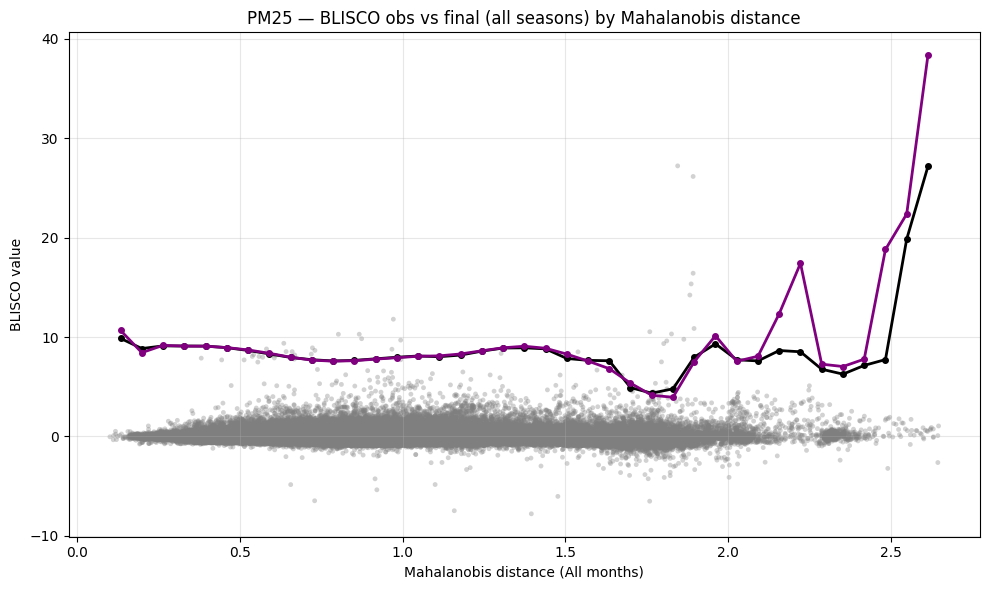

In [9]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data
relative_residual = (y_final - y_obs) / y_obs
# mask valid
valid_final = ~np.isnan(y_final)
valid_obs = ~np.isnan(y_obs)
valid_x = ~np.isnan(x)
print('valid_final size:', np.sum(valid_final))
print('valid_obs size:', np.sum(valid_obs))
print('valid_x size:', np.sum(valid_x))
# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_x], relative_residual[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
#plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
RMSE = np.sqrt( np.nanmean( (y_final[valid_final] - y_obs[valid_obs])**2 ) )
mean_obs = np.nanmean( y_obs[valid_obs] )
rRMSE = RMSE / mean_obs
print(f'Overall rRMSE (all seasons): {rRMSE:.3f}')

Overall rRMSE (all seasons): 0.259


[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5]
(43,)


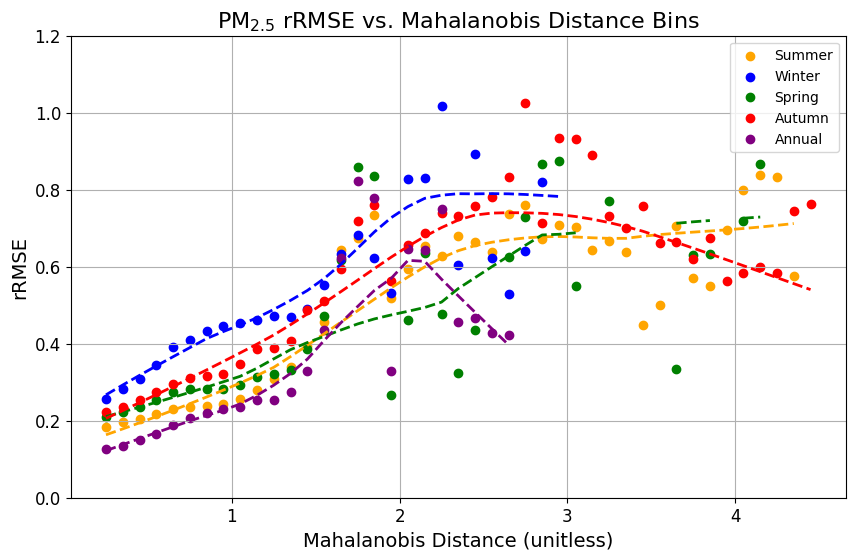

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/PM25/v1.8.1/Mahalanobis_distance_LOWESS_values/PM25_nearby_sites-30_BenchMark_Mahalanobis_distance_LOWESS_values.npy


In [11]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.2,end_bin=4.5,number_bins=43,LOWESS_frac=0.5,
                                      y_min=0.0,y_max=1.2,
                                      rRMSE=True,abs_bias=False)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [12]:
species = 'NO3'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 43
special_name = '_BenchMark_AllYEAR_TwoModels_withThreeStarsVariables-1-3-4'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height, nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [13]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [14]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances( buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (477435,)
shape of All_BLISCO_final_data: (477435,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (477435,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (477435,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (477435,)
shape of All_BLISCO_obs_data: (478086,)
shape of All_BLISCO_final_data: (478086,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (478086,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (478086,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (478086,)
shape of All_BLISCO_obs_data: (481215,)
shape of All_BLISCO_final_data: (481215,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (481215,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (481215,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (481215,)
shape of All_BLISCO_obs_data: (483840,)
shape of All_BLISCO_final_data: (483840,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


size of x: (170142,) size of y_final: (170142,) size of y_obs: (170142,)
number of nan in x: 0 number of nan in y_final: 0 number of nan in y_obs: 0


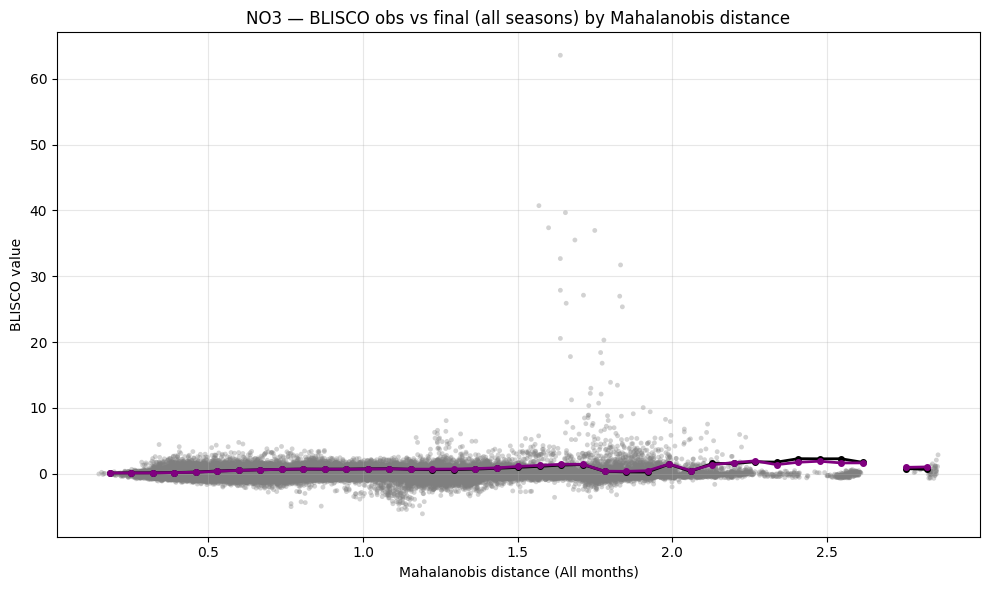

In [15]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data
relative_residual = (y_final - y_obs) / y_obs
# mask valid
print('size of x:', x.shape, 'size of y_final:', y_final.shape, 'size of y_obs:', y_obs.shape)
print('number of nan in x:', np.sum(np.isnan(x)), 'number of nan in y_final:', np.sum(np.isnan(y_final)), 'number of nan in y_obs:', np.sum(np.isnan(y_obs)))
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], relative_residual[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
#plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5]
(20,)


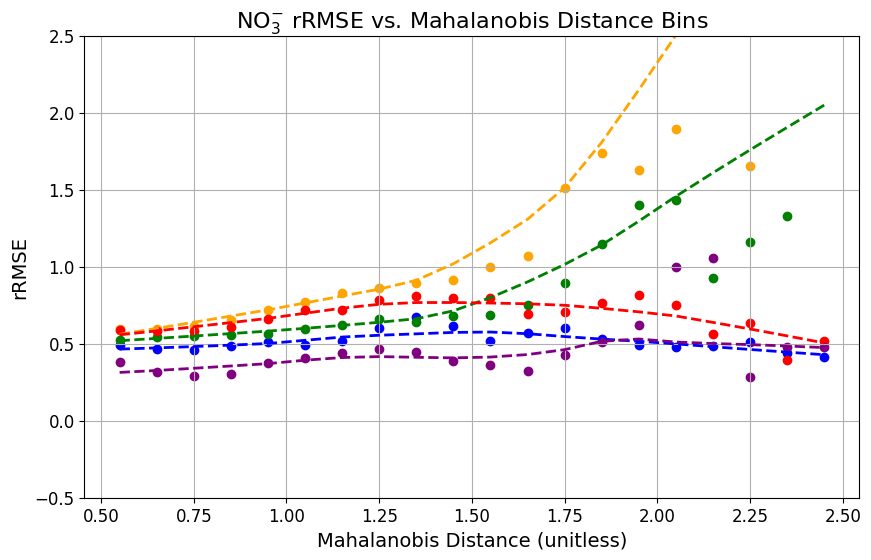

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/NO3/v1.8.1/Mahalanobis_distance_LOWESS_values/NO3_nearby_sites-20_BenchMark_AllYEAR_TwoModels_withThreeStarsVariables-1-3-4_Mahalanobis_distance_LOWESS_values.npy


In [16]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, start_bin=0.5, end_bin=2.5, number_bins=20, species=species,LOWESS_frac=0.5,y_min=-0.5,y_max=2.5,)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [17]:
##################################################################################
species = 'SO4'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 39
special_name = '_BenchMark_AllYEAR_TwoModels'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height, nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [18]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [19]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances( buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (499275,)
shape of All_BLISCO_final_data: (499275,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (499275,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (499275,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (499275,)
shape of All_BLISCO_obs_data: (499968,)
shape of All_BLISCO_final_data: (499968,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (499968,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (499968,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (499968,)
shape of All_BLISCO_obs_data: (504042,)
shape of All_BLISCO_final_data: (504042,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (504042,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (504042,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (504042,)
shape of All_BLISCO_obs_data: (506247,)
shape of All_BLISCO_final_data: (506247,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


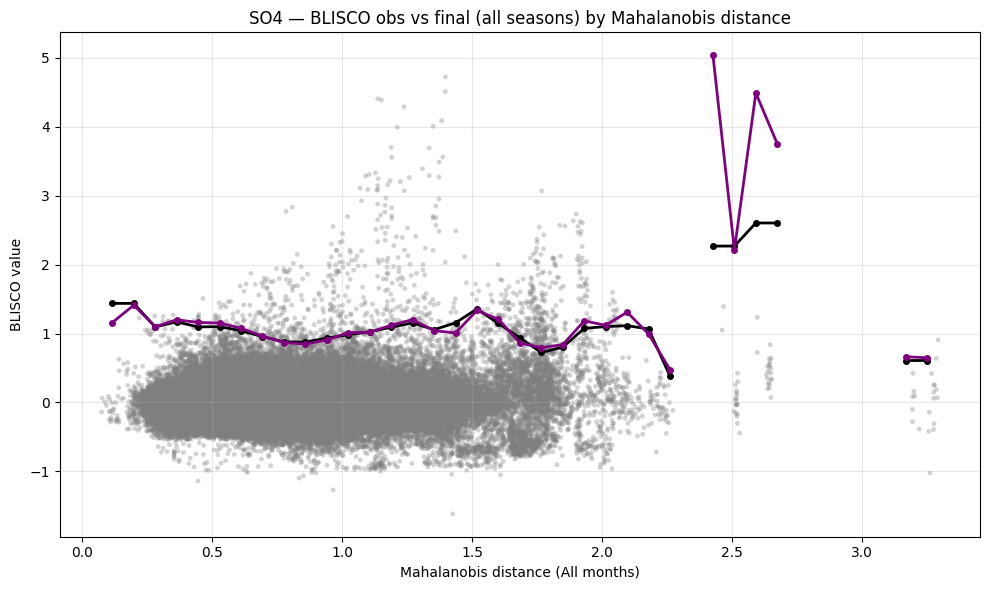

In [20]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data

# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
#plt.scatter(x[valid_obs], y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
#plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')
plt.scatter(x[valid_obs], (y_final - y_obs)[valid_obs]/y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5]
(24,)


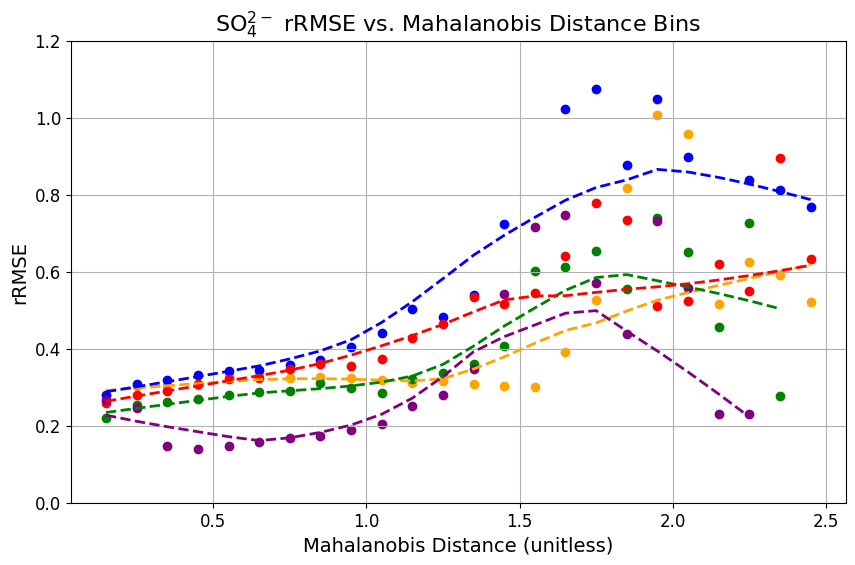

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/SO4/v1.8.1/Mahalanobis_distance_LOWESS_values/SO4_nearby_sites-20_BenchMark_AllYEAR_TwoModels_Mahalanobis_distance_LOWESS_values.npy


In [21]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.1,end_bin=2.5,number_bins=24,LOWESS_frac=0.5,y_min=0.0,y_max=1.2)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [22]:
##################################################################################
species = 'NH4'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 38
special_name = '_BenchMark_AllYEAR_TwoModels_withThreeStarsVariables'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height,nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [23]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [24]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances(buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (277271,)
shape of All_BLISCO_final_data: (277271,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (277271,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (277271,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (277271,)
shape of All_BLISCO_obs_data: (277053,)
shape of All_BLISCO_final_data: (277053,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (277053,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (277053,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (277053,)
shape of All_BLISCO_obs_data: (279157,)
shape of All_BLISCO_final_data: (279157,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (279157,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (279157,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (279157,)
shape of All_BLISCO_obs_data: (281514,)
shape of All_BLISCO_final_data: (281514,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


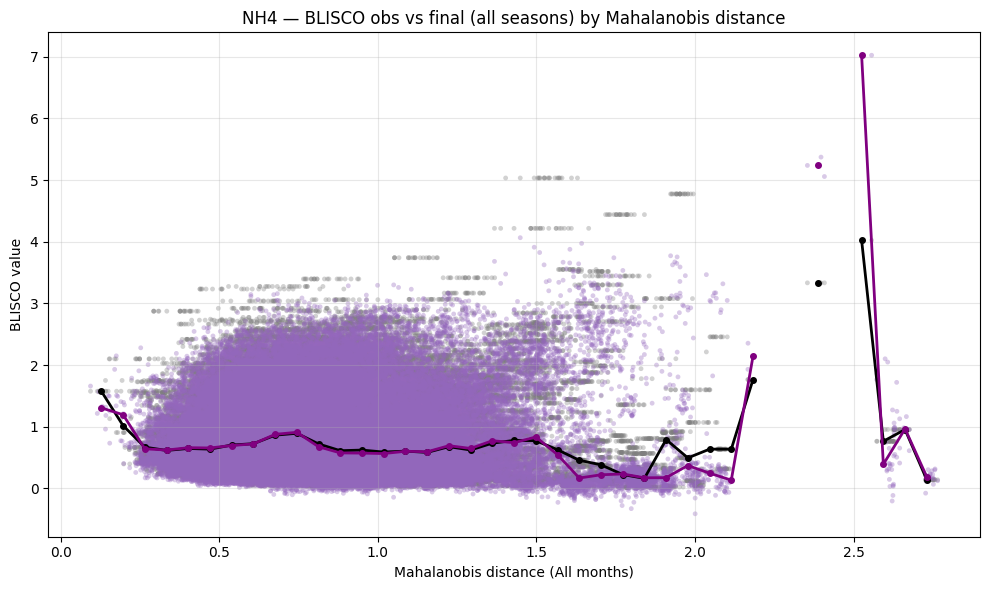

In [25]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data

# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
(30,)


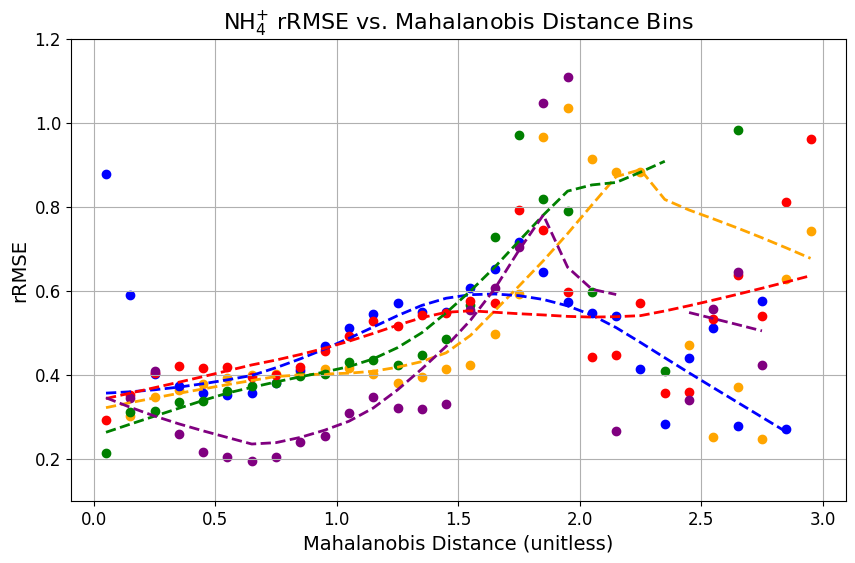

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/NH4/v1.8.1/Mahalanobis_distance_LOWESS_values/NH4_nearby_sites-20_BenchMark_AllYEAR_TwoModels_withThreeStarsVariables_Mahalanobis_distance_LOWESS_values.npy


In [26]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.0,end_bin=3,number_bins=30,LOWESS_frac=0.5,y_min=0.1,y_max=1.2)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [27]:
##################################################################################
species = 'BC'
version = 'v1.8.1'
typeName = Get_typeName(bias=False, normalize_bias=False, normalize_species=True, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 39
special_name = '_BenchMark_AllYEAR_TwoModels'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20

mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height,nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [28]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [29]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances(buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (397488,)
shape of All_BLISCO_final_data: (397488,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (397488,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (397488,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (397488,)
shape of All_BLISCO_obs_data: (396396,)
shape of All_BLISCO_final_data: (396396,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (396396,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (396396,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (396396,)
shape of All_BLISCO_obs_data: (401625,)
shape of All_BLISCO_final_data: (401625,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (401625,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (401625,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (401625,)
shape of All_BLISCO_obs_data: (405153,)
shape of All_BLISCO_final_data: (405153,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


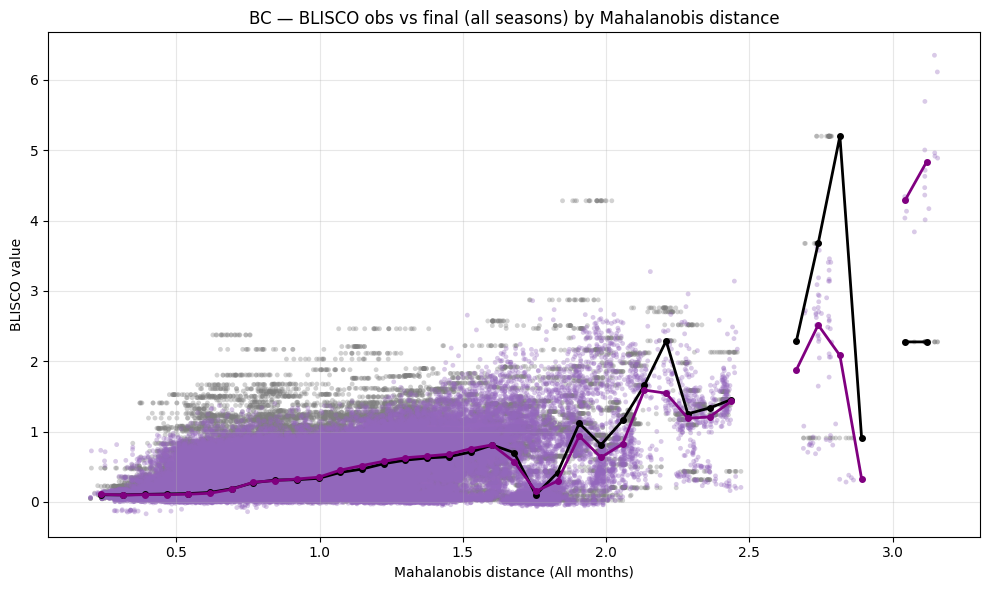

In [30]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data

# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.3        0.4173913  0.53478261 0.65217391 0.76956522 0.88695652
 1.00434783 1.12173913 1.23913043 1.35652174 1.47391304 1.59130435
 1.70869565 1.82608696 1.94347826 2.06086957 2.17826087 2.29565217
 2.41304348 2.53043478 2.64782609 2.76521739 2.8826087  3.        ]
(23,)


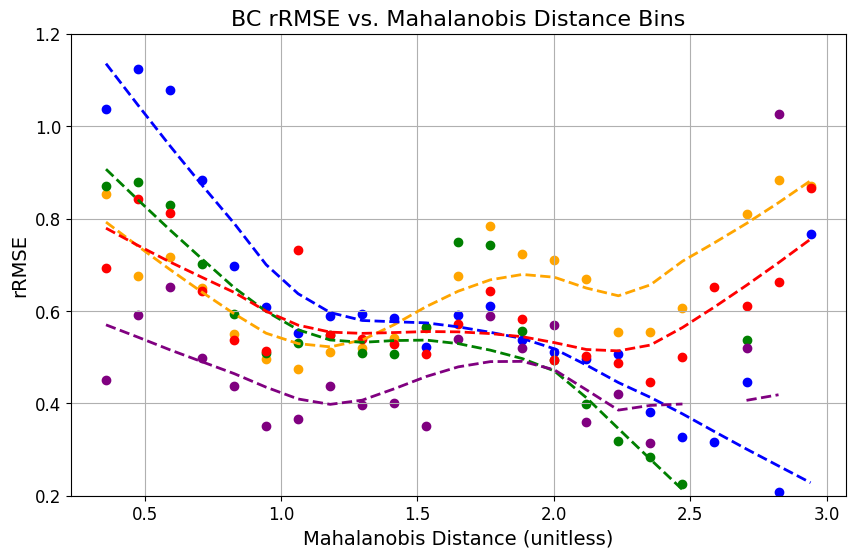

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/BC/v1.8.1/Mahalanobis_distance_LOWESS_values/BC_nearby_sites-20_BenchMark_AllYEAR_TwoModels_Mahalanobis_distance_LOWESS_values.npy


In [31]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.3,end_bin=3,number_bins=23,LOWESS_frac=0.5,y_min=0.2,y_max=1.2)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [32]:
##################################################################################
species = 'OM'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 33
special_name = '_BenchMark_withThreeStarVariables-Threshold5_EveryTenYearsModels'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height,nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [33]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [34]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances(buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (361578,)
shape of All_BLISCO_final_data: (361578,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (361578,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (361578,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (361578,)
shape of All_BLISCO_obs_data: (370293,)
shape of All_BLISCO_final_data: (370293,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (370293,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (370293,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (370293,)
shape of All_BLISCO_obs_data: (373695,)
shape of All_BLISCO_final_data: (373695,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (373695,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (373695,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (373695,)
shape of All_BLISCO_obs_data: (377769,)
shape of All_BLISCO_final_data: (377769,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


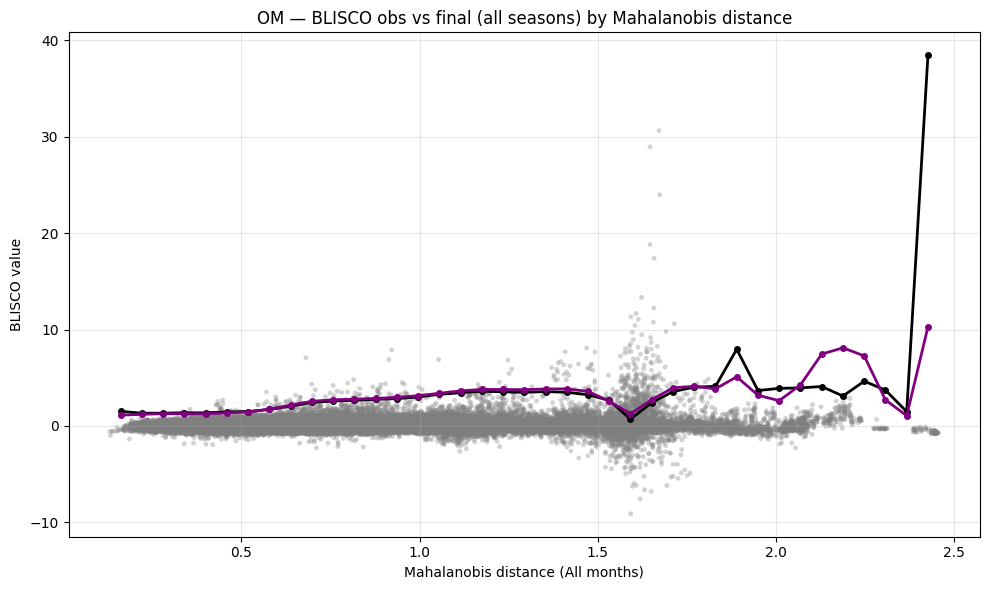

In [35]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = All_AllMonth_AllYear
x = np.log(x+1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data
relative_residual = (y_final - y_obs) / y_obs
# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], relative_residual[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
#plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
(30,)


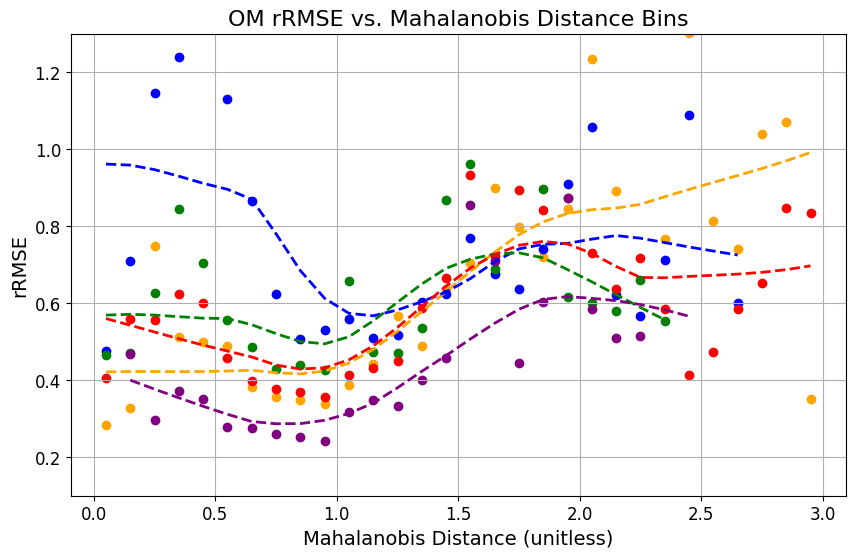

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/OM/v1.8.1/Mahalanobis_distance_LOWESS_values/OM_nearby_sites-20_BenchMark_withThreeStarVariables-Threshold5_EveryTenYearsModels_Mahalanobis_distance_LOWESS_values.npy


In [36]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,                                                                        
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.0,end_bin=3.0,number_bins=30,LOWESS_frac=0.5,
                                      y_min=0.1, y_max=1.3)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [37]:
##################################################################################
species = 'DUST'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 32
special_name = '_BenchMark_AllYEAR_TwoModels_Epoch51_withThreeStarVariables-Threshold5'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height,nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [38]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [39]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances(buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (427959,)
shape of All_BLISCO_final_data: (427959,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (427959,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (427959,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (427959,)
shape of All_BLISCO_obs_data: (446670,)
shape of All_BLISCO_final_data: (446670,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (446670,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (446670,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (446670,)
shape of All_BLISCO_obs_data: (447699,)
shape of All_BLISCO_final_data: (447699,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (447699,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (447699,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (447699,)
shape of All_BLISCO_obs_data: (448203,)
shape of All_BLISCO_final_data: (448203,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


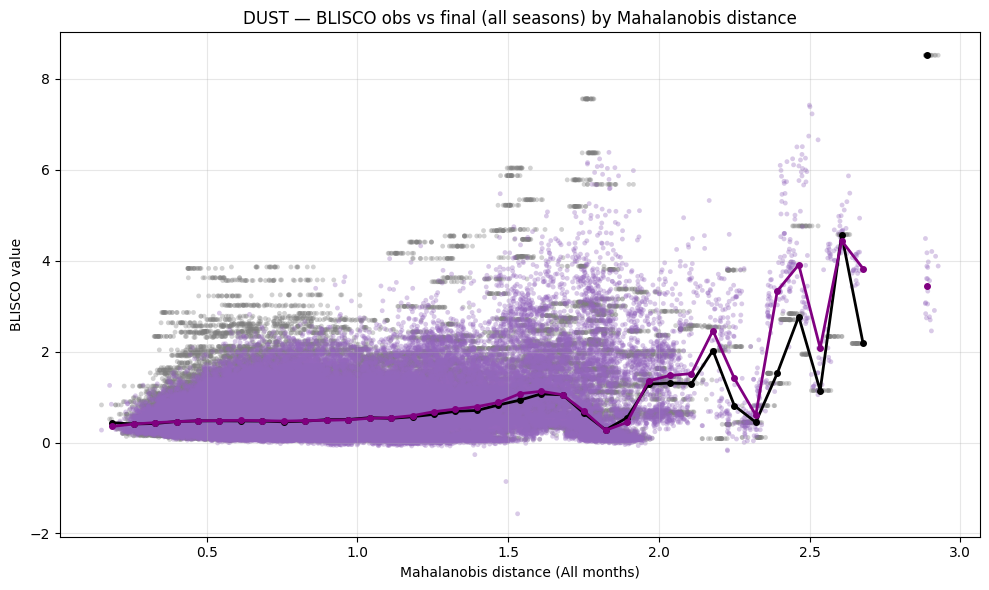

In [40]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data

# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)

plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]
(25,)


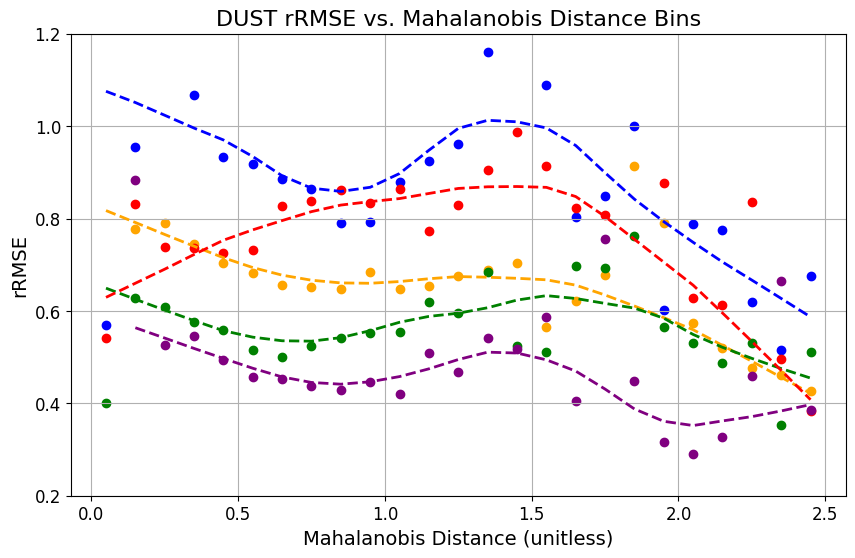

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/DUST/v1.8.1/Mahalanobis_distance_LOWESS_values/DUST_nearby_sites-20_BenchMark_AllYEAR_TwoModels_Epoch51_withThreeStarVariables-Threshold5_Mahalanobis_distance_LOWESS_values.npy


In [41]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0,end_bin=2.5,number_bins=25,LOWESS_frac=0.4,y_min=0.2,y_max=1.2)
save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

In [42]:
##################################################################################
species = 'SS'
version = 'v1.8.1'
typeName = Get_typeName(bias=True, normalize_bias=False, normalize_species=False, absolute_species=False, log_species=False, species=species)
startyear = 2000
endyear = 2023
nchannel = 42
special_name = '_BenchMark_twoModels-Threshold5'
width = 11
height = 11
training_data_version = 'NA_PM25-v1.8.0'
training_data_special_name = '_BenchMark'
buffer_radius_list = [0,10,20,30,40,50,60,70,80,90,100]#,110,120,130,140,150,160,170,180,190,200]
BLCO_kfold = 10
BLCO_seeds_number = 10
nearby_sites_number = 20
mahalanobis_distance_dic = load_mahalanobis_distance_data(species, version, typeName, startyear, endyear,
                                                            nchannel, special_name, width, height,nearby_sites_number)
BLISCO_data_dic = load_BLISCO_data(species, version, typeName, startyear, endyear,
                                    nchannel, special_name, width, height)

In [43]:
import gc
BLISCO_obs_data_recording = BLISCO_data_dic['BLISCO_obs_data_recording']
BLISCO_final_data_recording = BLISCO_data_dic['BLISCO_final_data_recording']
del BLISCO_data_dic
gc.collect()

EachMonth_EachYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_EachYear_Martix_Mahalanobis_distance_recording']
EachMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['EachMonth_AllYear_Martix_Mahalanobis_distance_recording']
AllMonth_AllYear_Martix_Mahalanobis_distance_recording = mahalanobis_distance_dic['AllMonth_AllYear_Martix_Mahalanobis_distance_recording']
del mahalanobis_distance_dic
gc.collect()

0

In [44]:

## Get Four Seasons and All data, and plot five lines in one figure

WINTER_MONTHS = ['Jan', 'Feb',  'Dec']
SPRING_MONTHS = ['Mar', 'Apr', 'May']
SUMMER_MONTHS = ['Jun','Jul','Aug']
AUTUMN_MONTHS = ['Sep','Oct','Nov']
ALL_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# MONTHS = ['Jun','Jul','Aug']

Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_EachMonth_EachYear_Martix_Mahalanobis_distance, Winter_EachMonth_AllYear_Martix_Mahalanobis_distance, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(WINTER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_EachMonth_EachYear_Martix_Mahalanobis_distance, Spring_EachMonth_AllYear_Martix_Mahalanobis_distance, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SPRING_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_EachMonth_EachYear_Martix_Mahalanobis_distance, Summer_EachMonth_AllYear_Martix_Mahalanobis_distance, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(SUMMER_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_EachMonth_EachYear_Martix_Mahalanobis_distance, Autumn_EachMonth_AllYear_Martix_Mahalanobis_distance, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance = Get_Mahalanobis_Distances(AUTUMN_MONTHS, buffer_radius_list, startyear, endyear,
                                                                 BLISCO_obs_data_recording,
                                                                 BLISCO_final_data_recording,
                                                                 EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                 EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                 AllMonth_AllYear_Martix_Mahalanobis_distance_recording)
All_BLISCO_obs_data, All_BLISCO_final_data, All_EachMonth_EachYear, All_EachMonth_AllYear, All_AllMonth_AllYear = Get_Annual_Mahalanobis_Distances( buffer_radius_list, startyear, endyear,
                                                                                                                                            BLISCO_obs_data_recording,
                                                                                                                                            BLISCO_final_data_recording,   
                                                                                                                                            EachMonth_EachYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            EachMonth_AllYear_Martix_Mahalanobis_distance_recording,
                                                                                                                                            AllMonth_AllYear_Martix_Mahalanobis_distance_recording)

shape of All_BLISCO_obs_data: (140732,)
shape of All_BLISCO_final_data: (140732,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (140732,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (140732,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (140732,)
shape of All_BLISCO_obs_data: (143072,)
shape of All_BLISCO_final_data: (143072,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (143072,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (143072,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (143072,)
shape of All_BLISCO_obs_data: (139914,)
shape of All_BLISCO_final_data: (139914,)
shape of All_EachMonth_EachYear_Martix_Mahalanobis_distance: (139914,)
shape of All_EachMonth_AllYear_Martix_Mahalanobis_distance: (139914,)
shape of All_AllMonth_AllYear_Martix_Mahalanobis_distance: (139914,)
shape of All_BLISCO_obs_data: (144408,)
shape of All_BLISCO_final_data: (144408,)
shape of All_EachMonth_EachYear_Martix_Mah

/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:30: RuntimeWarning: Mean of empty slice
  temp_obs_mean = np.nanmean(temp_obs_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:31: RuntimeWarning: Mean of empty slice
  temp_final_mean = np.nanmean(temp_final_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:69: RuntimeWarning: Mean of empty slice
  temp_eme_mean = np.nanmean(temp_eme_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:70: RuntimeWarning: Mean of empty slice
  temp_emay_mean = np.nanmean(temp_emay_array, axis=1)
/var/folders/vn/t6ls2d_j43d1g4v47j3tgvgr0000gn/T/ipykernel_55333/3075486225.py:71: RuntimeWarning: Mean of empty slice
  temp_aamay_mean = np.nanmean(temp_aamay_array, axis=1)


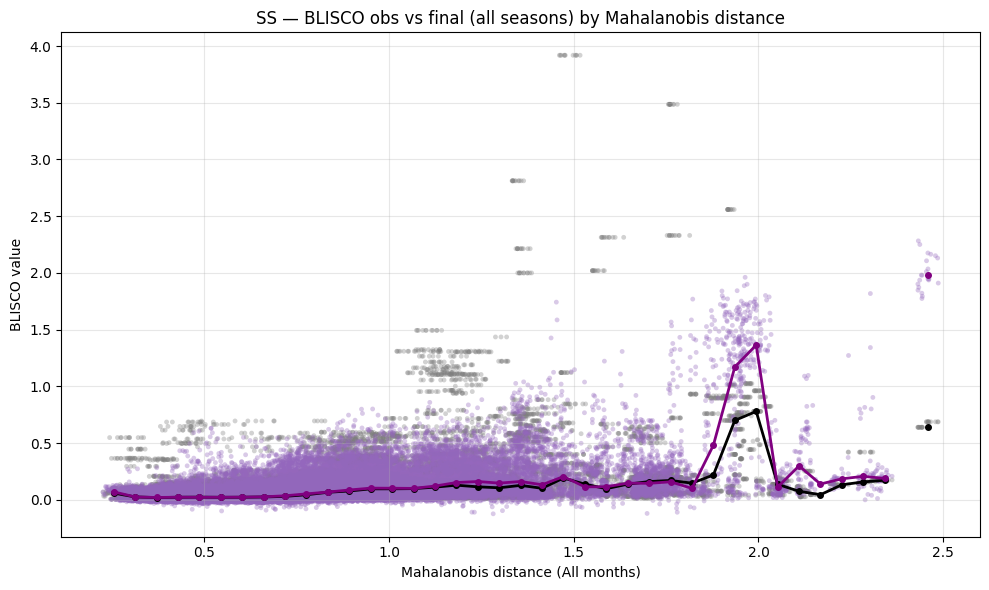

In [45]:
## Plot the distribution of BLISCO final recording data and obs data for all seasons vs Mahalanobis distance, scatter plot
## Not using plot_rRMSE_vs_Mahalanobis_distance function here
# Scatter BLISCO final vs obs against Mahalanobis distance (All seasons)
x = np.log(All_AllMonth_AllYear + 1)
y_final = All_BLISCO_final_data
y_obs = All_BLISCO_obs_data

# mask valid
valid_final = ~np.isnan(x) & ~np.isnan(y_final)
valid_obs = ~np.isnan(x) & ~np.isnan(y_obs)

# scatter
plt.figure(figsize=(10,6))
plt.scatter(x[valid_obs], y_obs[valid_obs], s=12, alpha=0.35, label='Obs (all)', c='tab:gray', edgecolors='none')
plt.scatter(x[valid_final], y_final[valid_final], s=12, alpha=0.35, label='Final (all)', c='tab:purple', edgecolors='none')

# binned medians to show trend
bins = np.linspace(np.nanmin(x), np.nanmax(x), 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
med_final = []
med_obs = []
for lo, hi in zip(bins[:-1], bins[1:]):
    msk = (x >= lo) & (x < hi)
    med_final.append(np.nanmedian(y_final[msk]) if np.any(msk & ~np.isnan(y_final)) else np.nan)
    med_obs.append(np.nanmedian(y_obs[msk]) if np.any(msk & ~np.isnan(y_obs)) else np.nan)

plt.plot(bin_centers, med_obs, '-o', color='black', lw=2, label='Obs median', markersize=4)
plt.plot(bin_centers, med_final, '-o', color='purple', lw=2, label='Final median', markersize=4)
plt.xlabel('Mahalanobis distance (All months)')
plt.ylabel('BLISCO value')
plt.title(f'{species} — BLISCO obs vs final (all seasons) by Mahalanobis distance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
(27,)


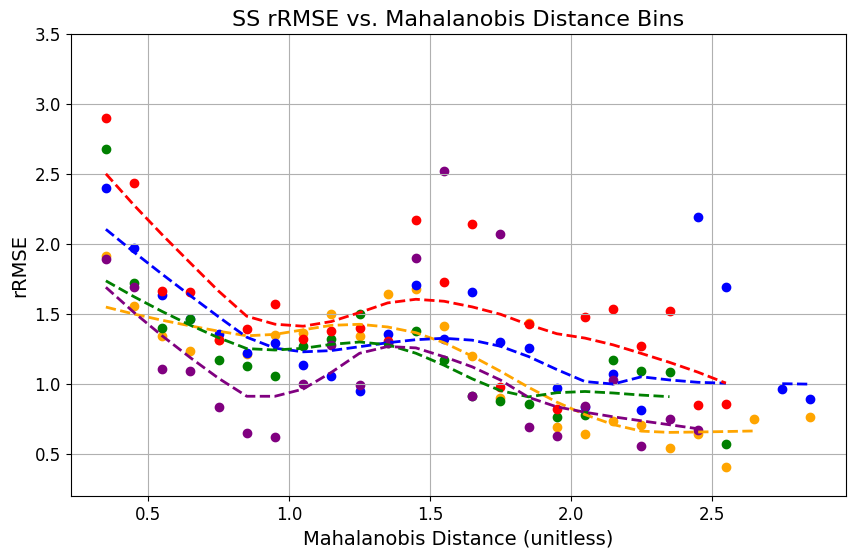

Saved LOWESS values to /Volumes/rvmartin/Active/s.siyuan/Projects/PM25_Speices_DL_2023/code/Manuscript_Figures/Mahalanobis_distance_uncertainty_calculation_plot/data/SS/v1.8.1/Mahalanobis_distance_LOWESS_values/SS_nearby_sites-20_BenchMark_twoModels-Threshold5_Mahalanobis_distance_LOWESS_values.npy


In [46]:
bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values = plot_rRMSE_vs_Mahalanobis_distance(Winter_BLISCO_obs_data, Winter_BLISCO_final_data, Winter_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                      Spring_BLISCO_obs_data, Spring_BLISCO_final_data, Spring_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Summer_BLISCO_obs_data, Summer_BLISCO_final_data, Summer_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        Autumn_BLISCO_obs_data, Autumn_BLISCO_final_data, Autumn_AllMonth_AllYear_Martix_Mahalanobis_distance,
                                        All_BLISCO_obs_data, All_BLISCO_final_data, All_AllMonth_AllYear,
                                      low_percentile=1, high_percentile=99, species = species,start_bin=0.3,end_bin=3,number_bins=27,LOWESS_frac=0.5,
                                      y_min=0.2,y_max=3.5)

save_bins_LOWESS_values(bin_centers,WINTER_LOWESS_values,SPRING_LOWESS_values,SUMMER_LOWESS_values,AUTUMN_LOWESS_values,ALL_LOWESS_values,
                        species,special_name, version,nearby_sites_number)

extent: [-40.005, -169.995, 10.005, 69.005]


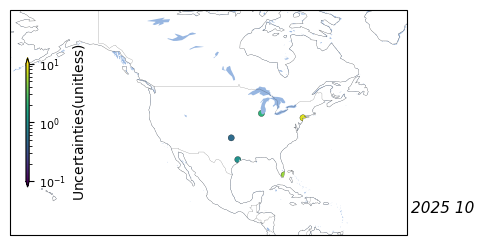

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.colors as colors
import matplotlib.ticker as tick

MONTH = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = plt.axes(projection=ccrs.PlateCarree())
extent = [10.005,69.005,-40.005,-169.995]
extent = [extent[2],extent[3],extent[0],extent[1]]
print('extent:', extent)
ax.set_aspect(1.25)
ax.set_extent(extent,crs=ccrs.PlateCarree())
ax.add_feature(cfeat.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='none', facecolor='white'))
ax.add_feature(cfeat.COASTLINE,linewidth = 0.15) 
ax.add_feature(cfeat.LAKES, linewidth   = 0.05)
ax.add_feature(cfeat.BORDERS, linewidth = 0.1)

ax.add_feature(cfeat.OCEAN) 

#RMSE = round(np.sqrt(mean_squared_error(sitePM25[area_index, (yyyy[iyear]-1998)*12+mm[imonth]],
#                                      pre_pm25_site[area_index])),2)
#R2 = round(linear_regression(sitePM25[area_index, (yyyy[iyear]-1998)*12+mm[imonth]],pre_pm25_site[area_index]),2)    
#ax.text(extent[2], extent[1]-0.1*abs(extent[1]), '$R^2 = $' + str(R2), style='italic', fontsize=12)
#ax.text(extent[2], extent[1], '$RMSE = $' + str(RMSE), style='italic', fontsize=12)

ax.text(extent[0]+0.01*abs(extent[1]-extent[0]),extent[2]+0.10*abs(extent[3]-extent[2]),'{} {}'.format(2025,'10'), style='italic',fontsize = 11)
lon_sites = [ -97.5164, -95.3698, -87.6298, -80.1918, -74.0060]
lat_sites = [  35.4676,  29.7604,  41.8781,  25.7617,  40.7128]
uncertainties_sites = [0.5, 1.0, 2.0, 5.0, 8.0]
pcm = ax.scatter(lon_sites, lat_sites, c=uncertainties_sites, s=20, cmap='viridis', norm=colors.LogNorm(vmin=0.1, vmax=10), edgecolors='k', linewidths=0.2, transform=ccrs.PlateCarree())
# Global colorbar parameters fraction=0.35, pad=-1.63, shrink=0.5, aspect=50.0
cbar = plt.colorbar(pcm, location = 'right', fraction=0.15, shrink=0.35, aspect=40.0, anchor=(-5.7,0.5), orientation='vertical', extend='both')
cbar.ax.tick_params(labelsize=8)

cbar.set_label('Uncertainties' + '' + r'$\rm{(unitless)}$', fontsize=10)
cbar.ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%.3f'))
plt.show()